# Proyecto Zuber

El presente análisis se realiza para la empresa de viajes compartidos llamada Zuber.

## Objetivo
El objetivo principal es comprender:
- Las preferencias de los pasajeros
- El impacto de los fatores externos en los viajes

Recursos: 
Se cuenta con la información en 4 diferentes datasets, que son los siguientes:
  - trips
  - cabs
  - neighborhoods
  - weather_records

También se trabaja con información localizada en un website.

Se realiza un analisis trabajando los datos con SQL y se realiza un análisis exploratorio de los datos con Python.

## Análisis exploratorio con Python

    Se trabaja con 3 archivos csv, en 2 de ellos se realiza un análisis cuyos resultados se demostrarán a continuación, y 1 archivo que servirá para realizar una prueba de hipótesis que se explicará más adelante. 

Se comienza con el análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

df_company.info()
display(df_company)
print(df_company.describe())
print('El número de registros duplicados es de:' , df_company.duplicated().sum() ,'filas')

df_trips.info()
display(df_trips)
print(df_trips.describe())
print('El número de registros duplicados es de:' , df_trips.duplicated().sum() ,'filas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
El número de registros duplicados es de: 0 filas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667
El número de registros duplicados es de: 0 filas


### Primeras Observaciones

El primer Dataframe al que he llamado 'df_company' el dataset presenta las siguientes características:
  - Registros     64
  - Filas         63
  - Columnas          2
      - Columnas tipo:
        - object: debido a que tenemos nombres de compañias
        - int64: debido a que tenemos el numero de viajes por compañia 
  - Columnas sin datos nulos
  - No hay filas duplicadas

Resalto que en la columna de 'company_name' hay algunos nombres de compañias que comienzan con números.

El segundo Dataframe al que he llamado 'df_trips' el dataset presenta las siguientes características:
  - Registros     94
  - Filas         93
  - Columnas          2
      - Columnas tipo:
        - object: debido a que tenemos nombres de la zona donde el cliente fue dejado 
        - float64: debido a que tenemos el numero promedio de viajes cuyo drop off es la zona determinada por la columna anterior 
  - Columnas sin datos nulos
  - No hay filas duplicadas

Por ultimo, se verifica si existen nombres de compañias o zonas que se encuentren duplicadas.

In [3]:
print('El número de nombres de compañias duplicados es de:', df_company['company_name'].duplicated().sum())
print('El número de nombres de zonas duplicadas es de:', df_trips['dropoff_location_name'].duplicated().sum())

El número de nombres de compañias duplicados es de: 0
El número de nombres de zonas duplicadas es de: 0


Se verifica que no hay duplicados en los registros de ambos datasets, por lo que podemos confiar en trabajar con estos archivos.

Podemos continuar con el análisis de los datos, debido a que la información de los datasets no requiere ningun tipo de ajuste.

## Análisis de datos

A continuación se muestran los 10 principales barrios en términos de finalización del recorrido

### 10 principales barrios

In [4]:
df_trips_sorted = df_trips.sort_values(by='average_trips', ascending=False)
print(df_trips_sorted.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Se observa que la mayoría de los drop off se realizan en el barrio de Loop, seguido de River North. 

### Diferencias Porcentuales

Se agregarán 2 columnas que demuestren la diferencia % entre los datos del barrio más solicitado contra los demás barrios para poder visualizar mejor la diferencia. Además de agregar otra columan donde podamos observar el % de diferencia entre promedio de viajes entre el barrio y el inmediato anterior.

In [5]:
df_trips_sorted['diff_percent'] = df_trips_sorted['average_trips'].pct_change() * 100
df_trips_sorted['popular_vs_rest_percent'] = ((df_trips_sorted['average_trips'] - df_trips_sorted['average_trips'].iloc[0]) / df_trips_sorted['average_trips'].iloc[0]) * 100

df_trips_sorted_10 = df_trips_sorted.head(10)

display(df_trips_sorted_10)

,dropoff_location_name,average_trips,diff_percent,popular_vs_rest_percent
0,Loop,10727.466667,NaN,0.000000
1,River North,9523.666667,-11.221662,-11.221662
2,Streeterville,6664.666667,-30.019950,-37.872875
3,West Loop,5163.666667,-22.521757,-51.864995
4,O'Hare,2546.900000,-50.676522,-76.258141
5,Lake View,2420.966667,-4.944573,-77.432075
6,Grant Park,2068.533333,-14.557546,-80.717411
7,Museum Campus,1510.000000,-27.001418,-85.923983
8,Gold Coast,1364.233333,-9.653422,-87.282801
9,Sheffield & DePaul,1259.766667,-7.657537,-88.256625


De entre los primeros 10 barrios más populares podemos que ver la diferencias de su promedio de viajes es muy variante, siendo relativamente más alto, entre más cerca están del top 5.

La diferencia porcentual entre el barrio en 10° lugar y el 1° lugar es del 88.25%, lo que nos indica que la mayor cuota de mercado se manejará en los primeros barrios de este listado, inclusive podríamos indicar que el top 4 son lás áreas más preferidas por los usuarios. 

### Gráficos

Se presentan algunos gráficos para una mejor comprensión y visualización de los datos.

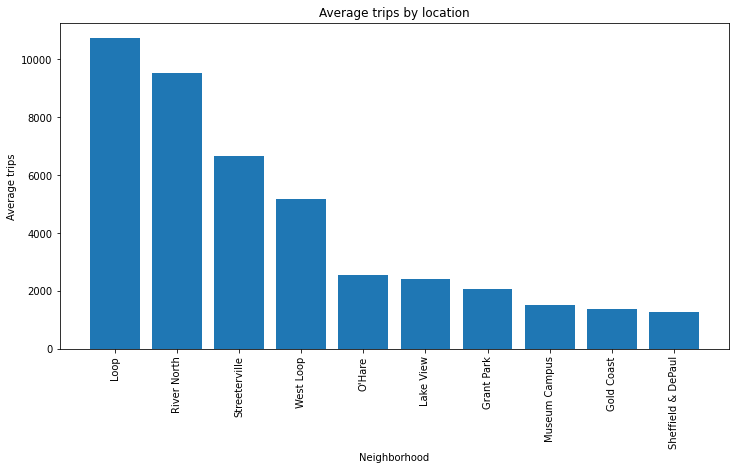

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(df_trips_sorted_10['dropoff_location_name'], df_trips_sorted_10['average_trips'])
plt.xlabel('Neighborhood')
plt.ylabel('Average trips')
plt.title('Average trips by location')
plt.xticks(rotation=90)

plt.show()

EL objetivo de estos gráficos, es el observar el comportamiento del promedio de los viajes por zona. Se muestra el top 10 de destinos por zona de drop off.

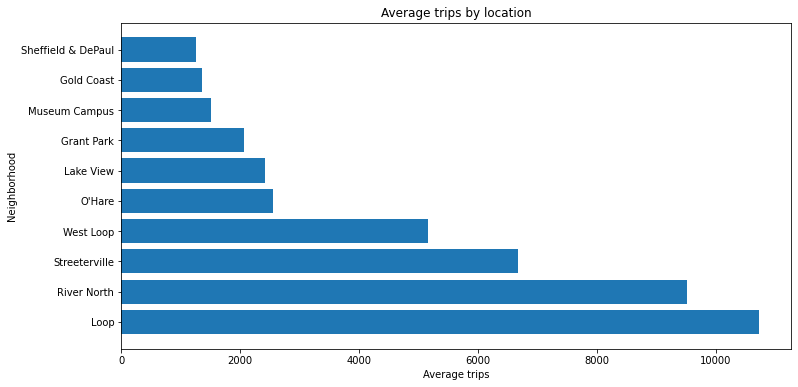

In [7]:
plt.figure(figsize=(12, 6))
plt.barh(df_trips_sorted_10['dropoff_location_name'], df_trips_sorted_10['average_trips'])
plt.ylabel('Neighborhood')
plt.xlabel('Average trips')
plt.title('Average trips by location')
plt.xticks(rotation=0)

plt.show()

Con respecto al promedio de viajes por destino, vemos a los primeros 4 destinos separarse del resto de los barrios representados en la gráfica. Indicando así que la mayor parte de los viajes, incluso en el top 10, podría llevarse en el top 4.

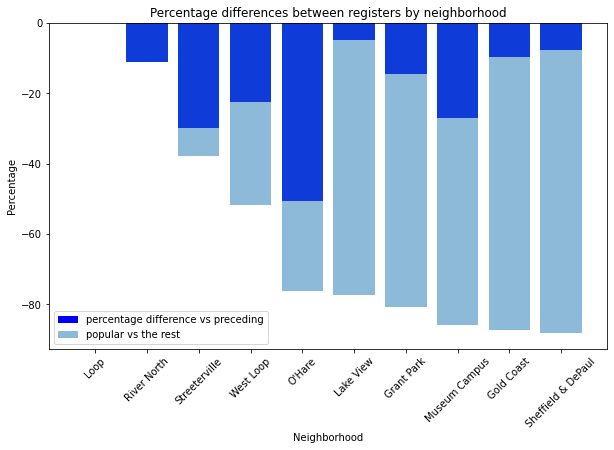

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(df_trips_sorted_10['dropoff_location_name'], df_trips_sorted_10['diff_percent'], label='percentage difference vs preceding', color = 'blue')
plt.bar(df_trips_sorted_10['dropoff_location_name'], df_trips_sorted_10['popular_vs_rest_percent'], label='popular vs the rest', alpha=0.5)
plt.xlabel('Neighborhood')
plt.ylabel('Percentage')
plt.title('Percentage differences between registers by neighborhood')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Y confirmamos con este gráfico, que hay una disminución considerable de viajes a partir del registro numero 5, que en este caso es el barrio de O'Hare, barrio que muestra un alto porcentaje de diferencia de viajes ante el barrio anterior más próximo. De igual manera, la diferencia de viajes promedio entre Loop, que es el barrio más popular para drop off, y O'Hare se dispara y se mantiene por una leve diferencia con respecto al resto de los barrios que le suceden. 
Por último, el tercer barrio Streeterville, es el primero que tiene una diferencia considerable entre su anterior inmediato y el promedio de viajes de Loop. 

## Prueba de Hipótesis

Zuber quiere saber si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Se me ha proporcionado un dataset que contine la duración primedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, unicamente los datos que corresponden a los Sábados. 

Se revisan los datos y se toman las acciones pertinentes para dejar los datos listos para su análisis. 

In [9]:
df = pd.read_csv('/datasets/project_sql_result_07.csv')

df.info()
display(df)
print(df.describe())
print('El numéro de filas duplicadas es de: ', df.duplicated().sum(), 'filas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000
El numéro de filas duplicadas es de:  197 filas


Revisando los datos, se encuentra que hay 197 filas duplicadas. Se podría comprender fecha, hora y estado de clima sean los mismos, no sería raro, pero que la duración del viaje sea exactamente igual, y más cuando hablamos en segundos no parece ser una casualidad. Parece que efectivamente tenemos filas duplicadas. Por esta razón, se decide eliminar los duplicados.

In [10]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.info()
print(df_no_duplicates['weather_conditions'].unique())
display(df_no_duplicates)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB
['Good' 'Bad']


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


Ahora con los datos ya listos, podemos comenzar. Se declaran las hipótesis:

Hipótesis nula (H0): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos". 

Hipótesis alternativa (H1): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare CAMBIA los sábados lluviosos".

Como recordatorio, nuestro documenta cuenta con la siguiente información:
-   contiene los datos de los viajes de Loop hasta el Aeropuerto Internacional O'Hare del día sábado
-   Hay una columan que indica si el día era 'Good' que indica que era un buen día, y que indica 'bad' que indica que era un día con mal clima, en este caso, lluvioso
-   Hay una columan que indica la duración de cada viaje, marcado en segundos

Con esto, lo que realizaremos será tener 2 dataset, haciendo una separación por estado del clima con el objetivo de revisar el promedio de viajes en el tramo referido dependiendo sí el clima es lluvioso o no. 

Declararé el nivel de alpha en 0.05, pues debido a la naturaleza del análisis, no parece necesario disminuir el nivel de precisión. Se realizará un prueba de Levene para determina la diferencia de varianzas, que nos ayudará a determinar si son iguales o no para la prueba de hipótesis.

### Prueba de Levene

In [11]:
df_good_weather = df_no_duplicates[df_no_duplicates['weather_conditions'] == 'Good']['duration_seconds']
df_bad_weather = df_no_duplicates[df_no_duplicates['weather_conditions'] == 'Bad']['duration_seconds']

levene_test = st.levene(df_good_weather,df_bad_weather)
alpha_levene_test = 0.05

if (levene_test.pvalue < alpha_levene_test):
    print('Se rechaza la hipótesis nula: las varianzas de la duración de los viajes son significativamente diferentes')
else:
    print('Se acepta la hipótesis nula: las varianzas de la duración de los viajes no son significativamente diferentes')


Se acepta la hipótesis nula: las varianzas de la duración de los viajes no son significativamente diferentes


### T-test

In [12]:
hypothesis_results = st.ttest_ind(df_good_weather,df_bad_weather,equal_var=True)
 
alpha_ttest = 0.05

if(hypothesis_results.pvalue < alpha_ttest):
    print('Se rechaza la hipótesis nula, hay evidencia suficiente para concluir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O\'Hare ES DIFERENTE los sábados lluviosos')
else:
    print('Se acepta la hipótesis nula, No hay diferencia significativa entre los viajes desde el Loop hasta el Aeropuerto Internacional O\'Hare entre días lluviosos y no lluviosos')

Se rechaza la hipótesis nula, hay evidencia suficiente para concluir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare ES DIFERENTE los sábados lluviosos


Después de la prueba de hipótesis, podemos indicar que efectivamente el clima es una factor que determina la duración de los viajes para los días sábados en el tramo que comprende el barrio de Loop hacia el Aeropuerto Internacional O'Hare.